# Spam Message Classification

1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.tsv",sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
##  null value check
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [9]:
ham.shape ,spam.shape

((4825, 4), (747, 4))

In [10]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [11]:
data=ham.append(spam,ignore_index=True)

<ipython-input-11-fb096279c7b2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [12]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [13]:
data.head()

,label,message,length,punct
0,ham,Dear i am not denying your words please,39,0
1,ham,Hello handsome ! Are you finding that job ? No...,152,7
2,ham,Don no da:)whats you plan?,26,3
3,ham,Carlos is taking his sweet time as usual so le...,127,2
4,ham,"Wen u miss someone, the person is definitely s...",141,12


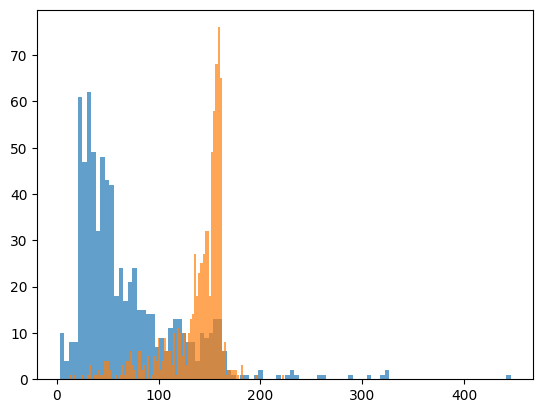

In [14]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

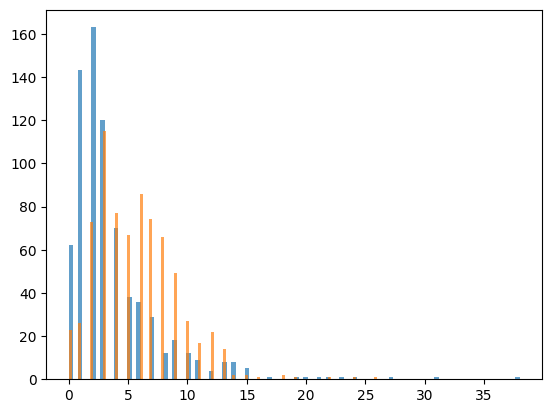

In [15]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.30,random_state=0,shuffle=True)

In [18]:
X_train.shape

(1045,)

In [19]:
X_test.shape

(449,)

## Building The Model (Random Forest)

In [20]:
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [21]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=10))])

In [22]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [23]:
## Prediction the result (Random forest)

In [24]:
y_pred=classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [26]:
accuracy_score(y_test,y_pred)

0.9398663697104677

In [27]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 24, 198]])

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [29]:
## Building SVM model

In [30]:
from sklearn.svm  import SVC

In [35]:
svm=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [36]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [37]:
y_pred=svm.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [39]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 20, 202]])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [43]:
test1=['Hello,you are learning natural language processing']

test2=['Hope you are doing good and learning new things !']

test3=['Congratulations,you won a lottery ticket worth  $1 million ! To claim call on 446677']

In [45]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [46]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
